In [1]:
import numpy as np
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor


from trading_envs import SimpleTradingEnv, TradingEnv, TradingEnvAdvanced
from logger import TrainingLoggerCallback
from data_and_plots import (
    generate_sine_wave,
    training_plot,
    results_plot,
    results_plot_continuous,
    get_shares_change_list,
    plot_shares_changes_fixed_size,
)
from helper import predict_data_env, sum_rewards_from_log_list
import torch
import random

In [2]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# ziarno dla NumPy
np.random.seed(42)

# ziarno dla standardowego generatora liczb losowych Pythona
random.seed(42)

In [3]:
prices = generate_sine_wave(seed=42)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 400`, after every 6 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=400 and n_envs=1)
  warnings.warn(
c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will t

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 63       |
| time/              |          |
|    fps             | 643      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 71.2       |
| time/                   |            |
|    fps                  | 531        |
|    iterations           | 2          |
|    time_elapsed         | 1          |
|    total_timesteps      | 800        |
| train/                  |            |
|    approx_kl            | 0.03611555 |
|    clip_fraction        | 0.471      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.07      |
|    explained_variance   | -1.99      |
|    learning_rate        | 0.0003     |
|   

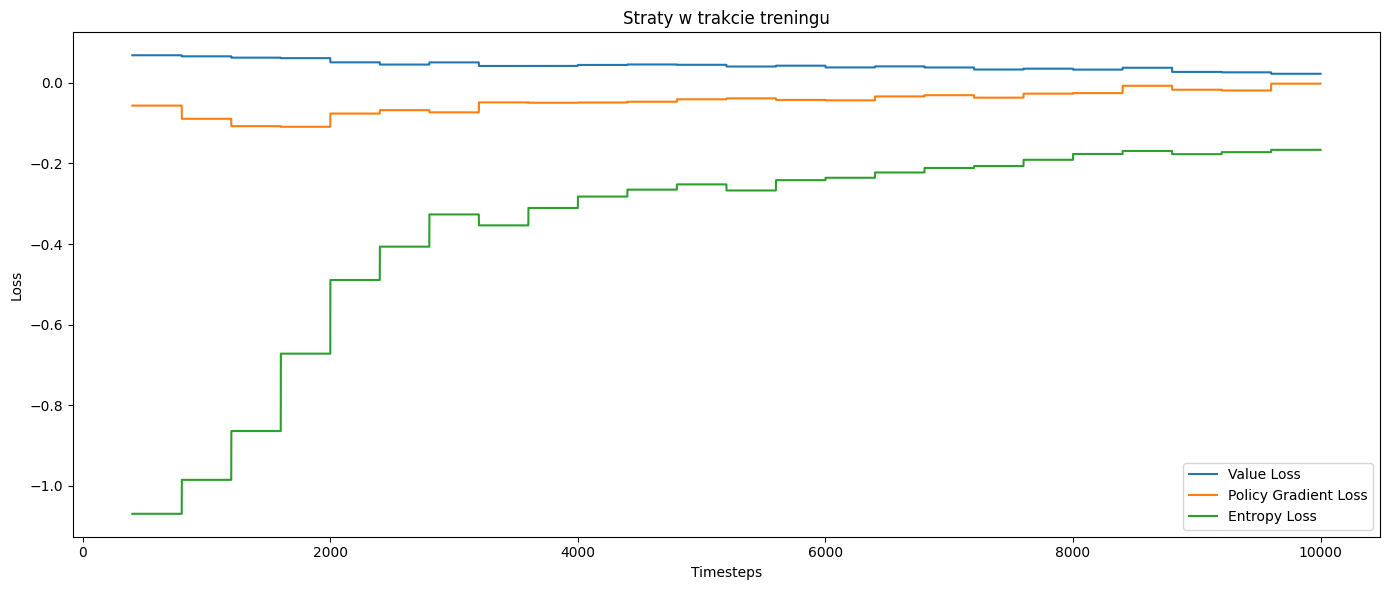

In [5]:
# Stwórz instancję środowiska
env_agent = SimpleTradingEnv(prices)
env_agent = Monitor(env_agent)

# Sprawdź zgodność środowiska ze Stable-Baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # tensorboard_log="./ppo_trading_tensorboard/",  # <- folder z logami
    policy_kwargs=dict(
        net_arch=[
            128,
            128,
        ]
    ),
    #   learning_rate=0.0005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    # batch_size=32,               # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.8,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=10_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [6]:
env_predict = predict_data_env(env=SimpleTradingEnv, data=prices, agent=model_agent)

Krok: 1, Cena: 5.17, Gotówka: 94.99, Akcje: 1, Wartość portfela: 100.16
Krok: 2, Cena: 5.39, Gotówka: 89.83, Akcje: 2, Wartość portfela: 100.61
Krok: 3, Cena: 5.58, Gotówka: 95.22, Akcje: 1, Wartość portfela: 100.80
Krok: 4, Cena: 5.71, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 5, Cena: 5.90, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 6, Cena: 6.11, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 7, Cena: 6.27, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 8, Cena: 6.45, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 9, Cena: 6.59, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 10, Cena: 6.78, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 11, Cena: 6.93, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 12, Cena: 7.06, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 13, Cena: 7.21, Gotówka: 100.80, Akcje: 0, Wartość portfela: 100.80
Krok: 14, Cena: 7.33, Gotówka: 100.80, Akcje: 0, W

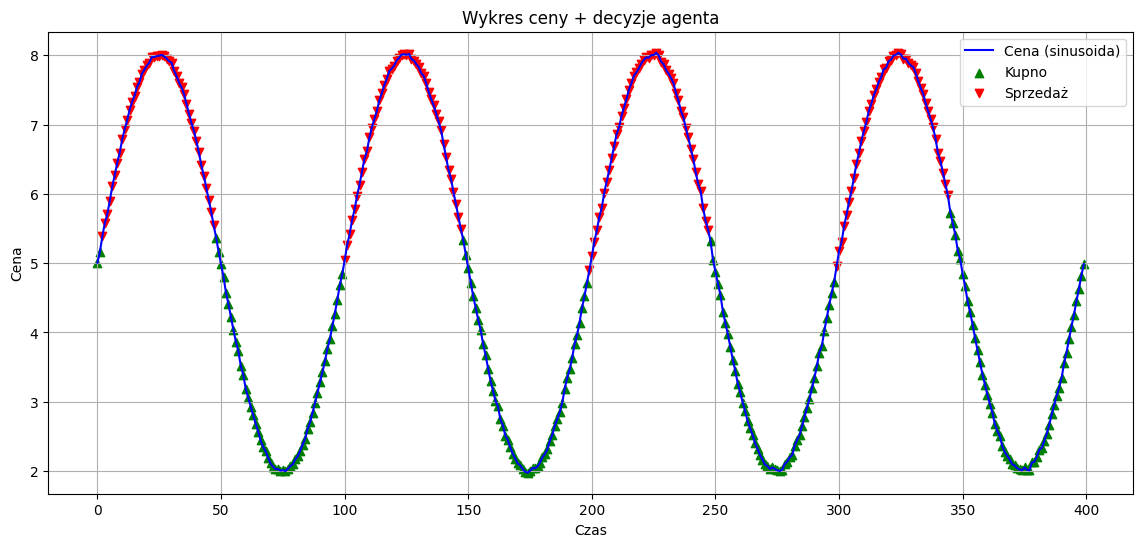

In [7]:
results_plot(env_predict=env_predict, prices=prices)

In [ ]:
print(np.min(prices), np.max(prices))

0.0 1.0


Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


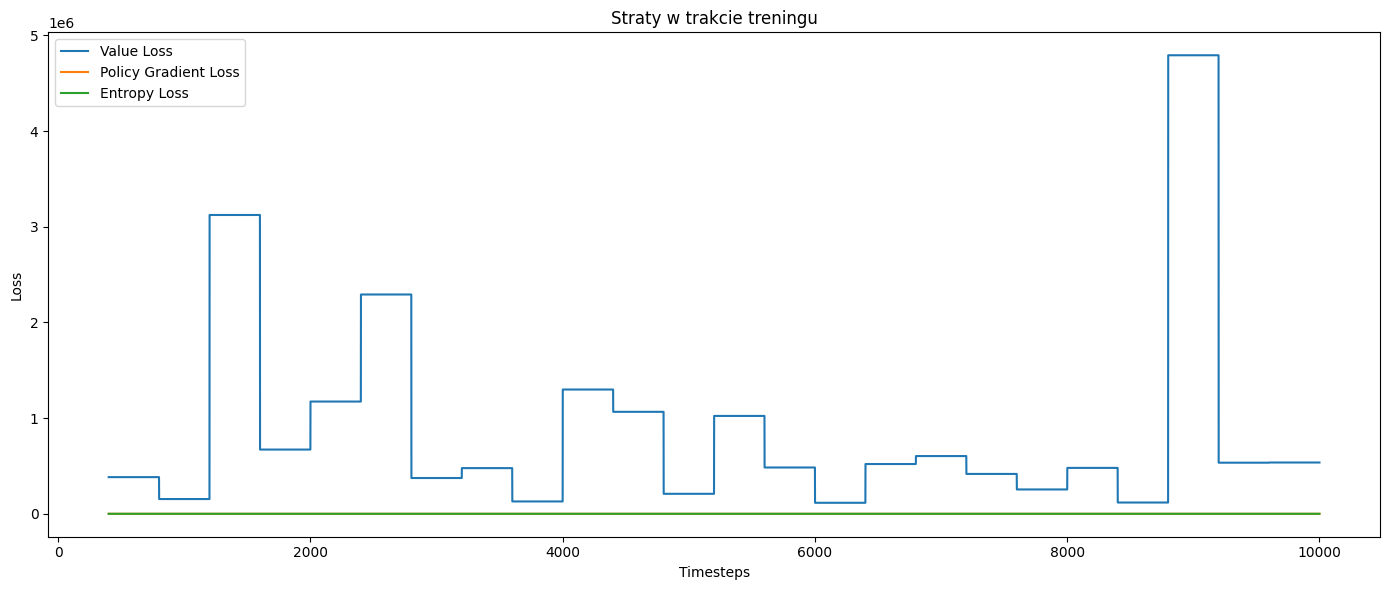

In [13]:
env_agent = TradingEnv(prices)
env_agent = Monitor(env_agent)

# Sprawdź zgodność środowiska ze Stable-Baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = A2C(
    "MlpPolicy",
    env_agent,
    # tensorboard_log="./ppo_trading_tensorboard/",  # <- folder z logami
    policy_kwargs=dict(net_arch=[1024, 1024, 1024]),
    # learning_rate=0.0005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    # batch_size=32,               # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    # gamma=0.99,                  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.5,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=10_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [14]:
env_predict = predict_data_env(env=TradingEnv, data=prices, agent=model_agent)

Krok: 1, Cena: 5.17, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: 0.0000
Krok: 2, Cena: 5.39, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -3.2350
Krok: 3, Cena: 5.58, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -7.7076
Krok: 4, Cena: 5.71, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -11.5110
Krok: 5, Cena: 5.90, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -14.0386
Krok: 6, Cena: 6.11, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -17.9213
Krok: 7, Cena: 6.27, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -22.0426
Krok: 8, Cena: 6.45, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -25.3273
Krok: 9, Cena: 6.59, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -28.8077
Krok: 10, Cena: 6.78, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -31.7196
Krok: 11, Cena: 6.93, Gotówka: 100.00, Akcje: 0, Wartość portfela: 100.00, Reward: -35.5301
K

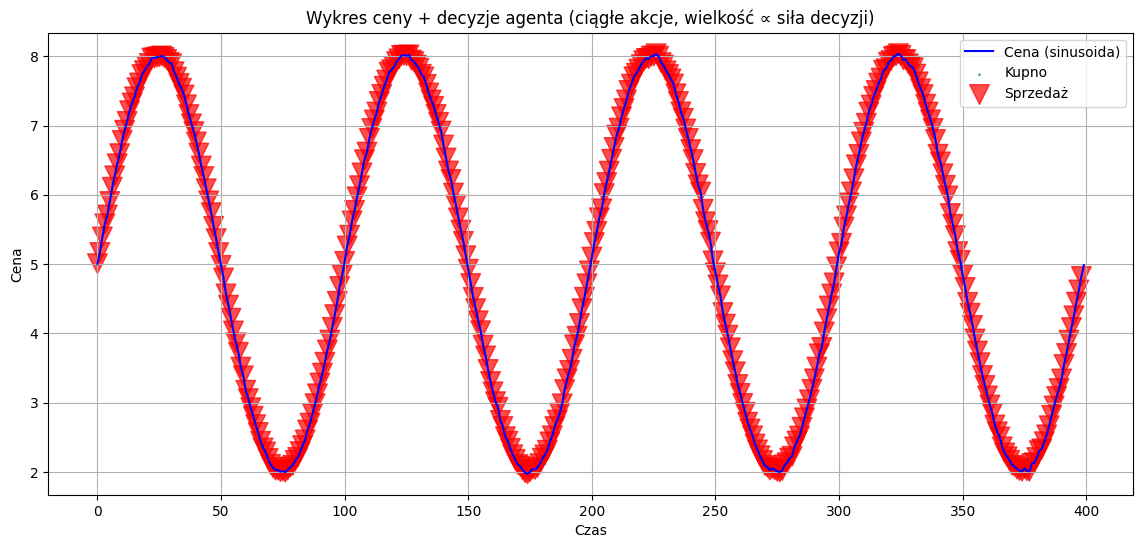

In [15]:
results_plot_continuous(env_predict=env_predict, prices=prices)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 399      |
|    ep_rew_mean     | 165      |
| time/              |          |
|    fps             | 697      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 399          |
|    ep_rew_mean          | 122          |
| time/                   |              |
|    fps                  | 562          |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 800          |
| train/                  |              |
|    approx_kl            | 0.0034882803 |
|    clip_fraction        | 0.055        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0.00891      |
|    learning_r

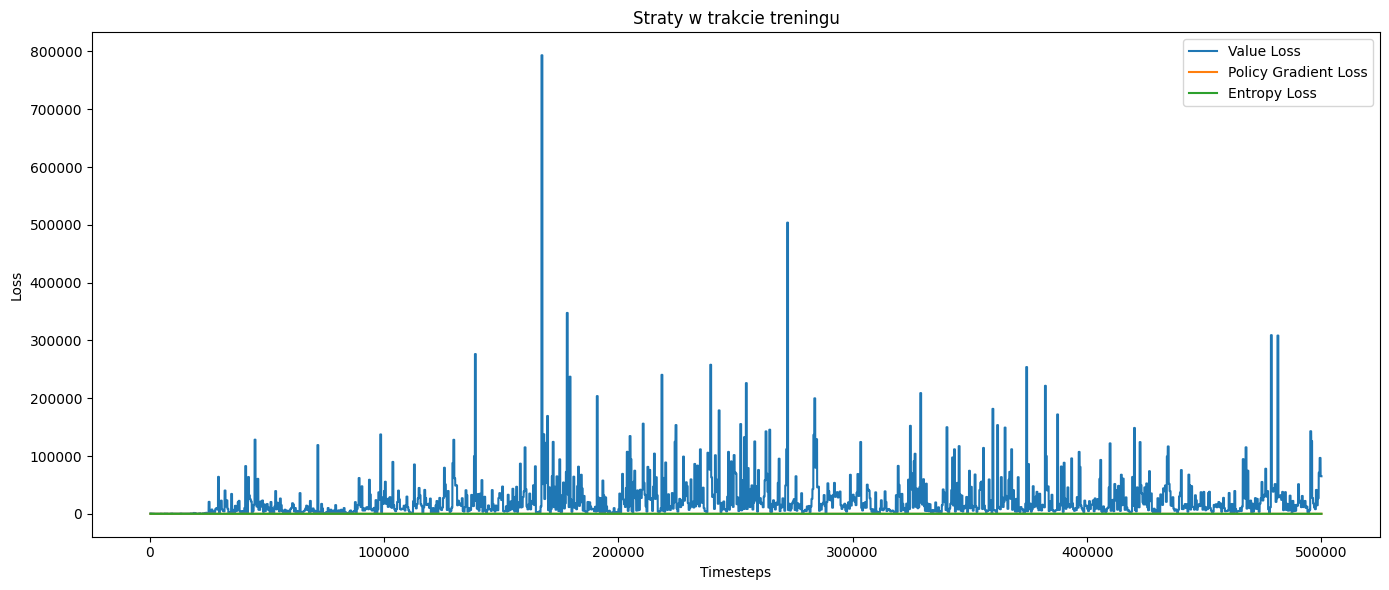

In [4]:
# Stwórz instancję środowiska
env_agent = TradingEnvAdvanced(prices)
env_agent = Monitor(env_agent)

# Sprawdź zgodność środowiska ze Stable-Baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # tensorboard_log="./ppo_trading_tensorboard/",  # <- folder z logami
    policy_kwargs=dict(
        net_arch=[
            256,
            256,
            256,
        ]
    ),
    #   learning_rate=0.001,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=100,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    # gamma=0.5,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.2,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=500_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [9]:
def predict_data_env(env, data, agent):
    env_predict = env(data)
    obs, _ = env_predict.reset(seed=42)
    done = False
    lista = []
    while not done:
        action, _states = agent.predict(obs, deterministic=False)
        obs, reward, done, _, info = env_predict.step(action)
        lista.append(env_predict.render())  # pokaże aktualną wartość portfela
    return env_predict, lista

In [10]:
env_predict, lista = predict_data_env(
    env=TradingEnvAdvanced, data=prices, agent=model_agent
)

Krok: 1 | Cena: 5.17 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 2 | Cena: 5.39 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 3 | Cena: 5.58 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 4 | Cena: 5.71 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 5 | Cena: 5.90 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 6 | Cena: 6.11 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 7 | Cena: 6.27 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 8 | Cena: 6.45 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0.0000 | Profit: 0.0000 | 
Krok: 9 | Cena: 6.59 | Gotówka: 100.00 | Akcje: 0 | Wartość portfela: 100.00 | Reward: 0

In [13]:
lista

[{'step': 1,
  'price': np.float64(5.168043361860632),
  'cash': 100,
  'shares': 0,
  'portfolio_value': np.float64(100.0),
  'reward': np.float64(0.0),
  'profit_ratio': np.float64(0.0)},
 {'step': 2,
  'price': np.float64(5.391946095496609),
  'cash': 100,
  'shares': 0,
  'portfolio_value': np.float64(100.0),
  'reward': np.float64(0.0),
  'profit_ratio': np.float64(0.0)},
 {'step': 3,
  'price': np.float64(5.582347331578863),
  'cash': 100,
  'shares': 0,
  'portfolio_value': np.float64(100.0),
  'reward': np.float64(0.0),
  'profit_ratio': np.float64(0.0)},
 {'step': 4,
  'price': np.float64(5.708879121619199),
  'cash': 100,
  'shares': 0,
  'portfolio_value': np.float64(100.0),
  'reward': np.float64(0.0),
  'profit_ratio': np.float64(0.0)},
 {'step': 5,
  'price': np.float64(5.903253595744088),
  'cash': 100,
  'shares': 0,
  'portfolio_value': np.float64(100.0),
  'reward': np.float64(0.0),
  'profit_ratio': np.float64(0.0)},
 {'step': 6,
  'price': np.float64(6.1095654425299

In [11]:
sum_rewards_from_log_list(lista)

3510.8317968983433

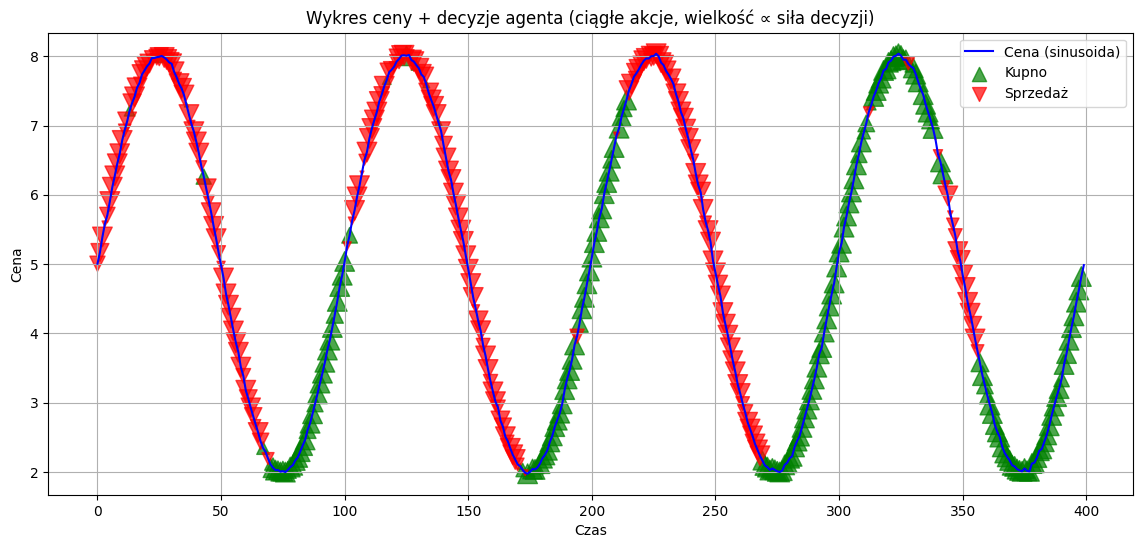

In [12]:
results_plot_continuous(env_predict=env_predict, prices=prices)

In [ ]:
shares_change_list = get_shares_change_list(lista)
shares_change_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 -2,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 -5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 -9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 1,
 -6,
 11,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -8,
 4,
 -6,
 -35,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 -5,
 0,
 0,
 0,
 -1,
 0,
 0,
 32,
 -8,
 -24,
 0,
 8,
 -8,
 0,
 0,
 4,
 -4,
 0,
 0,
 0,
 4,
 -3,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 54,
 -5,
 68,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -66,
 49,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -11,
 11,
 0,
 0,
 0,
 -120,
 -3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

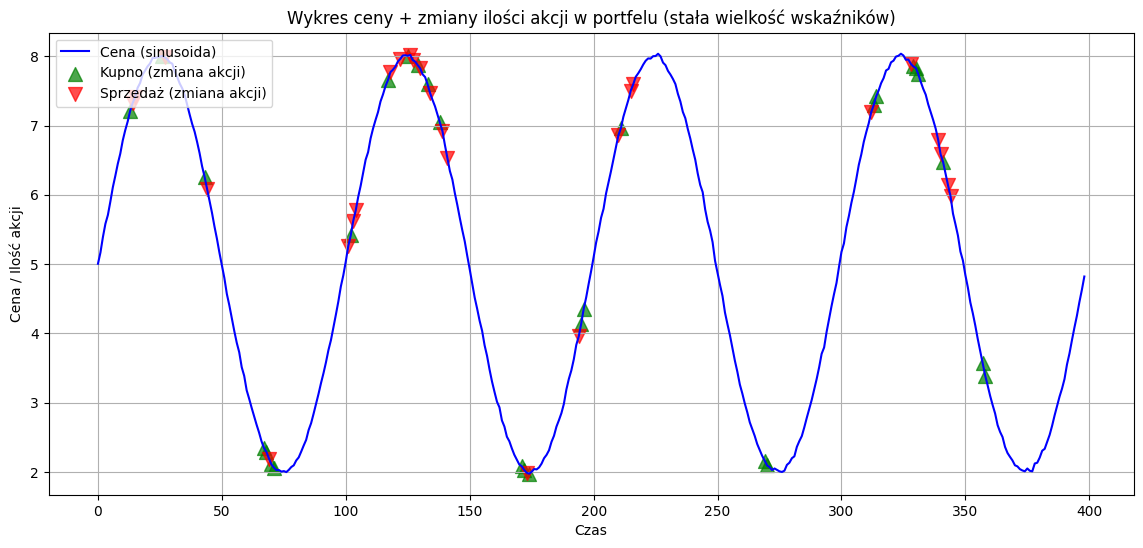

In [ ]:
plot_shares_changes_fixed_size(lista, prices)